1. Sumber Dataset

    Dataset diperoleh dari sumber Kaggle
    https://www.kaggle.com/code/mohamedelaziz/fashion-retail

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

In [3]:
path_data = '../Fashion_Retail_Sales_Raw.csv'

# Membaca dataset
df = pd.read_csv(path_data)

print("Sample Data:")
display(df.head())

Sample Data:


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


None


--- Jumlah Missing Values ---


Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


--- Statistik Deskriptif ---


,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


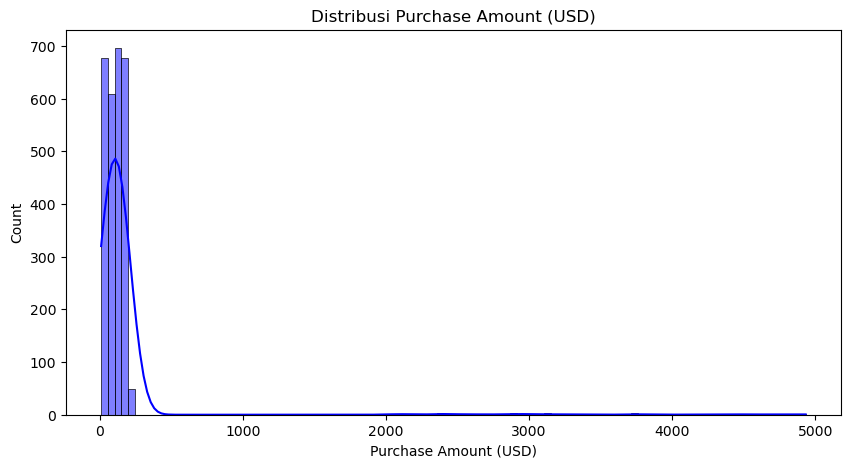

/tmp/ipykernel_11155/1082746829.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment Method', palette='viridis')


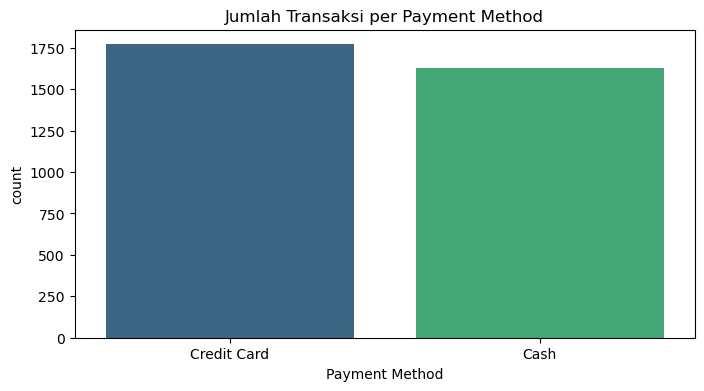

In [4]:
# 1. Informasi dasar dataset
print("--- Informasi Dataset ---")
display(df.info())

# 2. Cek Missing Values
print("\n--- Jumlah Missing Values ---")
display(df.isnull().sum())

# 3. Statistik Deskriptif
print("\n--- Statistik Deskriptif ---")
display(df.describe())

# 4. Visualisasi Distribusi Purchase Amount
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase Amount (USD)'], kde=True, color='blue')
plt.title('Distribusi Purchase Amount (USD)')
plt.show()

# 5. Visualisasi Payment Method
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Payment Method', palette='viridis')
plt.title('Jumlah Transaksi per Payment Method')
plt.show()

In [5]:
# Nggawe copy supaya data asli aman
df_clean = df.copy()

# 1. Handling Missing Values (Imputation)
# Purchase Amount (USD) diisi nganggo Median amarga data retail biasane ana outlier
df_clean['Purchase Amount (USD)'] = df_clean['Purchase Amount (USD)'].fillna(df_clean['Purchase Amount (USD)'].median())

# Review Rating diisi nganggo Mean
df_clean['Review Rating'] = df_clean['Review Rating'].fillna(df_clean['Review Rating'].mean())

# 2. Feature Selection (Hapus kolom sing ora dibutuhake kanggo model)
# Customer Reference ID lan Date Purchase dibuang amarga ora relevan kanggo prediksi rega/rating
df_clean = df_clean.drop(['Customer Reference ID', 'Date Purchase', 'Item Purchased'], axis=1)

# 3. Categorical Encoding
# Ngowahi Payment Method dadi angka (Label Encoding manual)
df_clean['Payment Method'] = df_clean['Payment Method'].map({'Credit Card': 1, 'Cash': 0})

print("Preprocessing Rampung!")
display(df_clean.head())

Preprocessing Rampung!


,Purchase Amount (USD),Review Rating,Payment Method
0,4619.0,2.999057,1
1,2456.0,2.000000,1
2,2102.0,4.100000,0
3,3126.0,3.200000,0
4,3003.0,4.700000,0


In [6]:
# Nggawe folder yen durung ana
output_dir = 'dataset_preprocessing'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simpen dadi CSV
output_path = os.path.join(output_dir, 'fashion_sales_processed.csv')
df_clean.to_csv(output_path, index=False)

print(f"Data wis disimpen ing: {output_path}")

Data wis disimpen ing: dataset_preprocessing/fashion_sales_processed.csv
